<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/Category_Algorithms/DB_Scan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

In [0]:
raw_data = pd.read_csv('/content/gdrive/My Drive/project_data/final_data.csv')
data = raw_data.iloc[:30000,1:]

In [0]:
 data_with_labels = pd.read_csv('/content/gdrive/My Drive/project_data/final_data_of_labels.csv')

 without_address = data_with_labels.iloc[:,1:]
 without_address.head()
 frames = [without_address,data]
 data = pd.concat(frames)
 data.head()
 

,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved
0,76,0.731680,1.749834e+17,3370,5.515366,6.650000e+02,1.144667e+10,571899.631579,1.542536e+04,18,10.857143,187.222222,0.306409,0.040649
1,38,743.099990,1.173769e+20,107756,380.117988,4.578265e+12,3.926573e+12,881654.973684,3.142301e+02,14,3.800000,7700.285714,27.151285,53.078571
2,32,9574.442265,5.529880e+18,4187,13440.143033,2.215655e+56,3.021617e+56,254212.625000,2.146797e+03,5,8.000000,837.400000,2688.028607,1914.888453
3,55,40.151860,3.103932e+19,28,10.105297,1.262155e+07,1.382587e+05,824758.618182,1.212605e+06,14,4.583333,4.000000,0.721807,2.867990
4,43,183.158125,1.276902e+20,5762,54.066817,2.521367e+07,3.642789e+06,918001.674419,8.381761e+03,17,3.583333,338.941176,3.180401,10.774007


In [0]:
pipe = Pipeline([('scale', StandardScaler()), ('PCA', PCA(n_components=6))])

results = pipe.fit_transform(data)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=.2)

db.fit(results)

print(db.components_.shape)

labels = np.unique(db.labels_)
indices = db.core_sample_indices_

sample, outliers = results[indices], np.delete(results, indices, axis=0)
s_labels, o_labels = db.labels_[indices], np.delete(db.labels_, indices, axis=0)

(29791, 6)


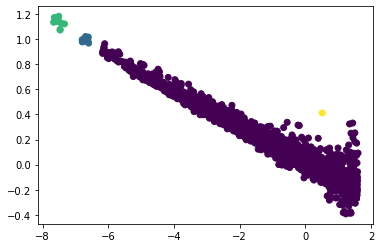

In [0]:
# plt.scatter(outliers[:,0], outliers[:,1], c='black', alpha=.2)
plt.scatter(sample[:,3], sample[:,4], c= s_labels)

# plt.xlim(-1,30)
# plt.ylim(-1,20)

(-1.0, 1.0)

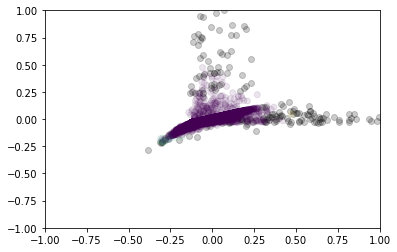

In [0]:

plt.scatter(outliers[:,0], outliers[:,1], c='black', alpha=.2)
plt.scatter(sample[:,0], sample[:,1], c= s_labels, alpha= .1)

plt.xlim(-1,1)
plt.ylim(-1,1)

In [0]:

np.unique(db.labels_)

array([-1,  0,  1,  2,  3])

In [0]:
data['labels'] = pd.DataFrame(o_labels, columns=["Lables"])
data['address'] = pd.concat([data_with_labels.iloc[:,0],raw_data.iloc[:30000,0]])

In [0]:
data.head()

,no_of_in_transactions,tot_ether_recieved,eth_balance,no_of_out_transactions,tot_ether_sent,tot_token_value_recieved,tot_token_value_sent,time_b/w_in_txn,time_b/w_out_txn,active_months,monthly_out_txn,monthly_in_txn,monthly_ether_sent,monthly_ether_recieved,labels,address
0,76,0.731680,1.749834e+17,3370,5.515366,6.650000e+02,1.144667e+10,571899.631579,1.542536e+04,18,10.857143,187.222222,0.306409,0.040649,-1.0,0x1d1c9f70a68c129096d8181529041843e8bc1a30
1,38,743.099990,1.173769e+20,107756,380.117988,4.578265e+12,3.926573e+12,881654.973684,3.142301e+02,14,3.800000,7700.285714,27.151285,53.078571,-1.0,0x2faf487a4414fe77e2327f0bf4ae2a264a776ad2
2,32,9574.442265,5.529880e+18,4187,13440.143033,2.215655e+56,3.021617e+56,254212.625000,2.146797e+03,5,8.000000,837.400000,2688.028607,1914.888453,-1.0,0xaf8ae6955d07776ab690e565ba6fbc79b8de3a5d
3,55,40.151860,3.103932e+19,28,10.105297,1.262155e+07,1.382587e+05,824758.618182,1.212605e+06,14,4.583333,4.000000,0.721807,2.867990,-1.0,0x8b99f3660622e21f2910ecca7fbe51d654a1517d
4,43,183.158125,1.276902e+20,5762,54.066817,2.521367e+07,3.642789e+06,918001.674419,8.381761e+03,17,3.583333,338.941176,3.180401,10.774007,-1.0,0x15c5312e24482547ff35899afedcaeb572ecb029


In [1]:
X=outliers
range_n_clusters = [5]
silhouette_plotter(X, range_n_clusters,tsne_results)


For n_clusters = 5 The average silhouette_score is : 0.00063940452
